# Import Library

In [1]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-d

In [2]:
# Library yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
from tqdm.notebook import tqdm as tq
import pandas as pd
import numpy as np

In [3]:
# Libraries untuk pembangunan model
!pip install tensorflow==2.15
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Input, Rescaling
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [4]:
# Libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise
import seaborn as sns

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Collection

In [6]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"martinompusunggu","key":"a64632e09e2fc91c78dd910f09ead272"}'}

In [7]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 90% 134M/149M [00:01<00:00, 107MB/s]
100% 149M/149M [00:01<00:00, 103MB/s]


In [8]:
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

# Data Pre-Processing

In [9]:
#Direktori
train_dir = 'Training'
test_dir = 'Testing'

#Combined Direktori
combined_dir = 'brain_xray/dataset'

In [10]:
# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)

In [11]:
# Salin file dan folder dari train
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

## Dataset Checking

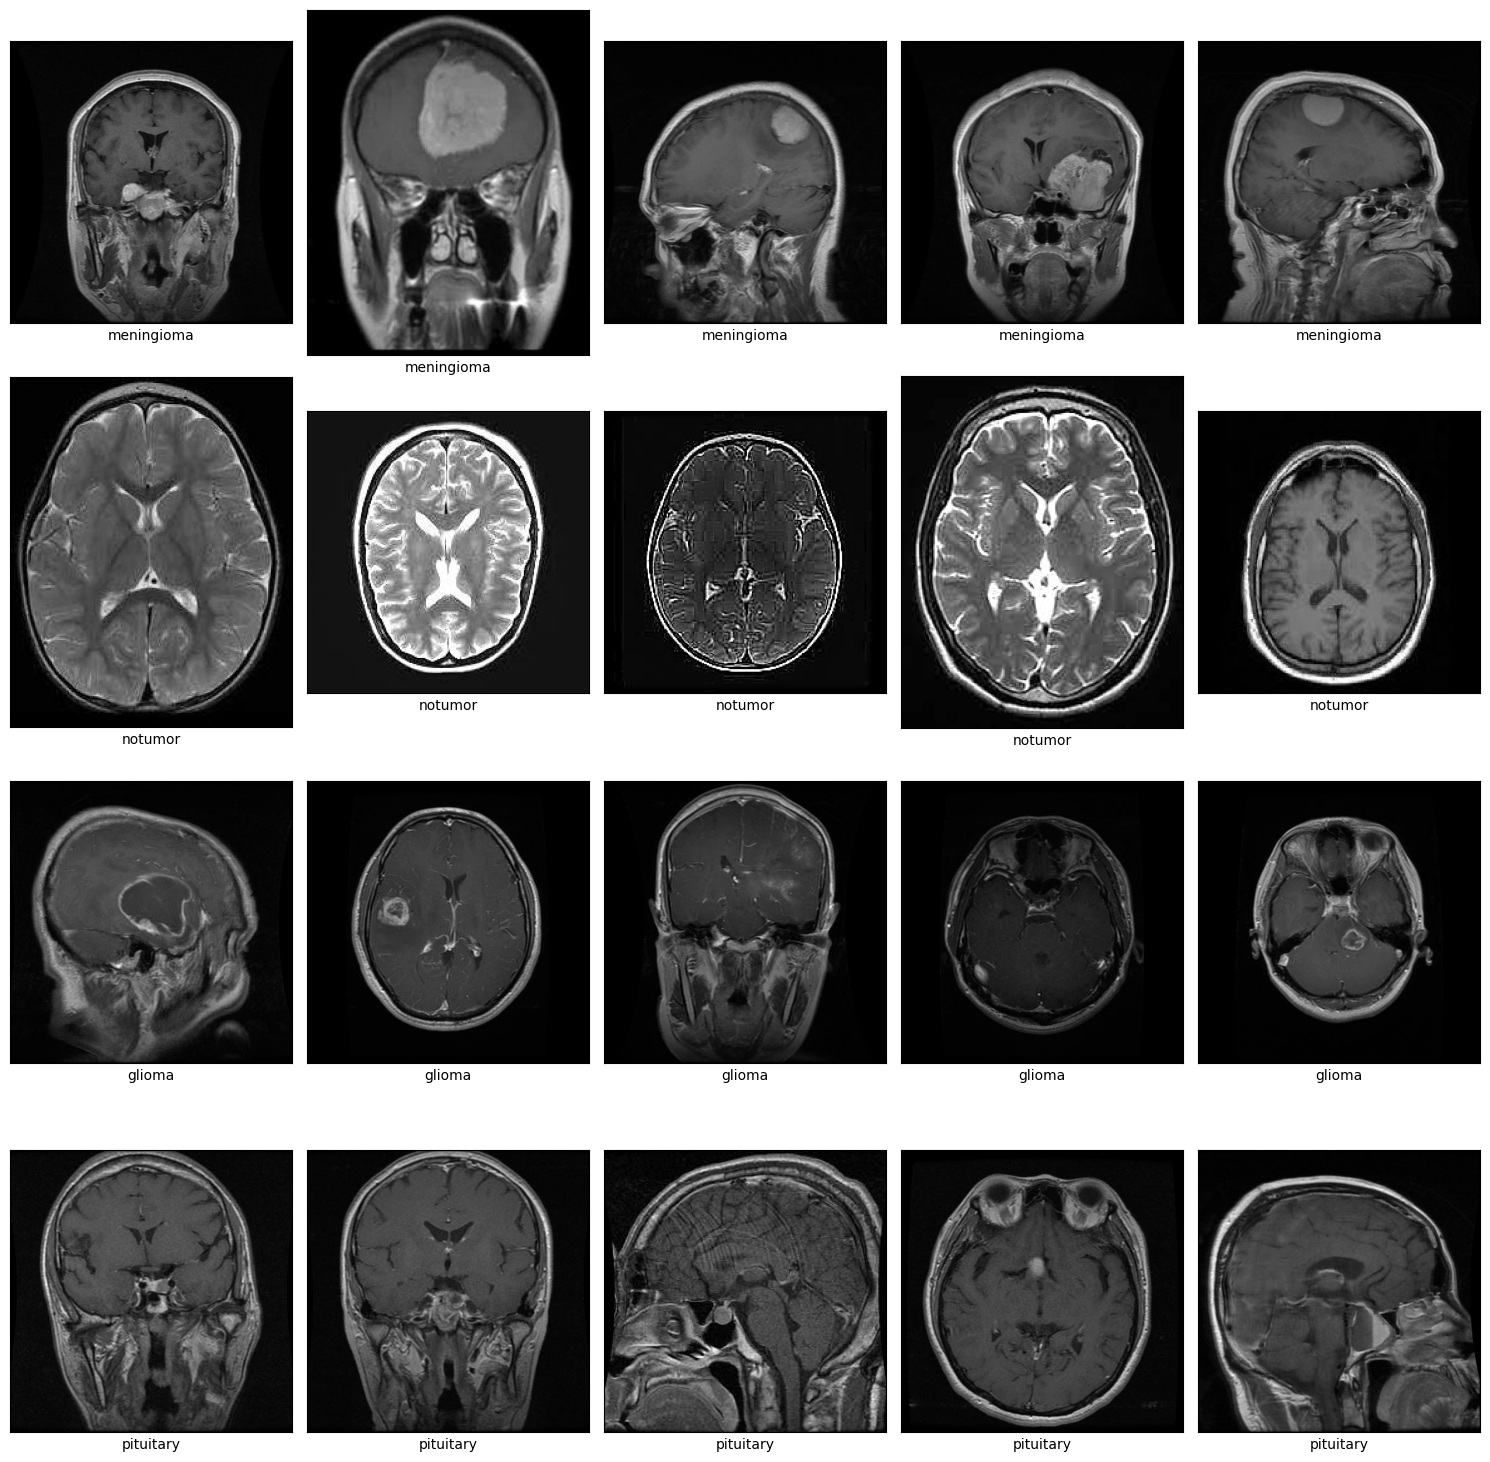

In [12]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
brain_image = {}

# Tentukan path sumber train
path = "brain_xray/"
path_sub = os.path.join(path, "dataset")
for i in os.listdir(path_sub):
    brain_image[i] = os.listdir(os.path.join(path_sub, i))

# Menampilkan secara acak 5 gambar di bawah setiap dari 2 kelas dari data.
# Anda akan melihat gambar yang berbeda setiap kali kode ini dijalankan.
path_sub = "brain_xray/dataset/"

# Menampilkan secara acak 5 gambar di bawah setiap kelas dari data latih
fig, axs = plt.subplots(len(brain_image.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(path_sub)):
    images = np.random.choice(brain_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, class_name, image_name)
        img = Image.open(img_path).convert("L")  # Konversi menjadi skala keabuan
        axs[i, j].imshow(img, cmap='gray')
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])


fig.tight_layout()

##  Plot Distribusi

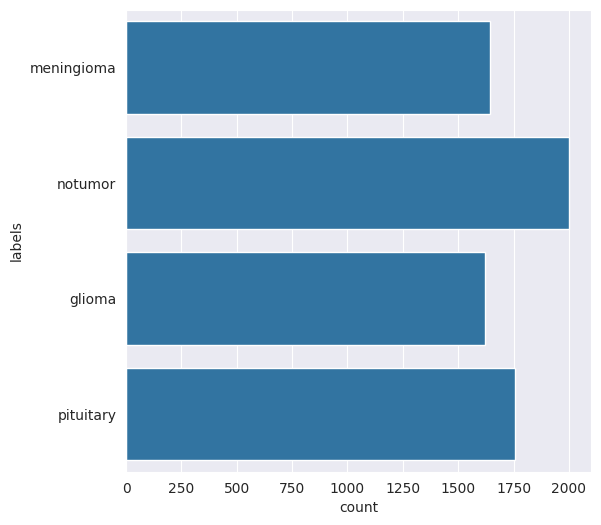

In [13]:
#Sumber
brain_path = 'brain_xray/dataset/'

# Buat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
file_name = []
labels = []
full_path = []

# Dapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai dataframe
for path, subdirs, files in os.walk(brain_path):
  for name in files:
    full_path.append(os.path.join(path, name))
    labels.append(path.split('/')[-1])
    file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# Plot distribusi gambar di setiap kelas
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

# Data Augmentation

In [14]:
# Membuat fungsi untuk melakukan rotasi berlawanan arah jarum jam
def anticlockwise_rotation(img):
  img = cv2.cvtColor(img, 0)
  img = cv2.resize(img, (256,256))
  sudut = random.randint(0, 180)
  return rotate(img, sudut)

# Membuat fungsi untuk melakukan rotasi searah jarum jam
def clockwise_rotation(img):
  img = cv2.cvtColor(img, 0)
  img = cv2.resize(img, (256,256))
  sudut = random.randint(0, 180)
  return rotate(img, -sudut)

# Membuat fungsi untuk membalik gambar secara vertikal dari atas ke bawah
def flip_up_down(img):
  img = cv2.cvtColor(img, 0)
  img = cv2.resize(img, (256,256))
  return np.flipud(img)

# Membuat fungsi untuk memberikan efek peningkatan kecerahan pada gambar
def add_brightness(img):
  img = cv2.cvtColor(img, 0)
  img = cv2.resize(img, (256,256))
  img = adjust_gamma(img, gamma=0.5, gain=1)
  return img

# Membuat fungsi untuk memberikan efek blur pada gambar
def blur_image(img):
  img = cv2.cvtColor(img, 0)
  img = cv2.resize(img, (256,256))
  return cv2.GaussianBlur(img, (9,9),0)

# Membuat fungsi untuk memberikan efek pergeseran acak pada gambar
def sheared(img):
  img = cv2.cvtColor(img, 0)
  img = cv2.resize(img, (256,256))
  transform = AffineTransform(shear=0.2)
  shear_image = warp(img, transform, mode='wrap')
  return shear_image

# Membuat fungsi untuk melakukan pergeseran melengkung pada gambar
def warp_shift(img):
  img = cv2.cvtColor(img, 0)
  img = cv2.resize(img, (256,256))
  transform = AffineTransform(translation=(0,40))
  warp_image = warp(img, transform, mode="wrap")
  return warp_image

In [15]:
# Membuat variabel transformasi yang akan menyimpan semua proses pra-pemrosesan yang telah dilakukan sebelumnya
transformations = {'rotate anticlockwise' : anticlockwise_rotation,
                  'rotate clockwise' : clockwise_rotation,
                  'flip up down' : flip_up_down,
                  'add brigthness' : add_brightness,
                  'blurring image' : blur_image,
                  'sheared image' : sheared,
                  'warp shift' : warp_shift}

dataset_dirs = ['brain_xray/dataset/glioma', 'brain_xray/dataset/meningioma', 'brain_xray/dataset/pituitary']

# Loop untuk menerapkan augmentasi ke masing-masing dataset
for dataset_dir in dataset_dirs:
    images = []

    # Baca nama gambar dari folder dan tambahkan path ke dalam array "images"
    for im in os.listdir(dataset_dir):
        images.append(os.path.join(dataset_dir, im))

    images_to_generate = 250
    i = 1

    while i <= images_to_generate:
        image = random.choice(images)
        try:
            original_image = io.imread(image)
            transformed_image = None
            n = 0  # Variabel untuk melakukan iterasi sampai jumlah transformasi yang akan diterapkan
            transformation_count = random.randint(1, len(transformations))  # Pilih jumlah transformasi acak yang akan diterapkan pada gambar

            while n < transformation_count:
                key = random.choice(list(transformations))  # Secara acak memilih dan memanggil metode
                transformed_image = transformations[key](original_image)
                n += 1

            new_image_path = os.path.join(dataset_dir, f"augmented_image_{i}.jpg")
            transformed_image = img_as_ubyte(transformed_image)  # Konversi gambar ke format byte
            cv2.imwrite(new_image_path, transformed_image)  # Simpan hasil transformasi augmentasi pada gambar ke path yang ditentukan
            i += 1
        except ValueError as e:
            print('Could not read the', image, ':', e, 'hence skipping it.')

print("Augmentasi selesai!")

Augmentasi selesai!


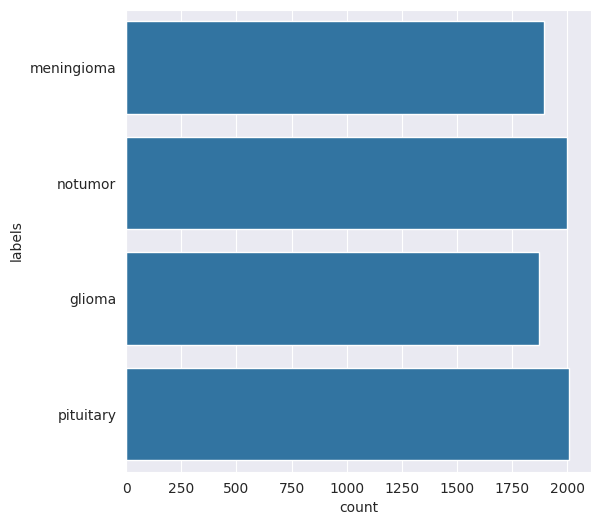

In [16]:
# Definisikan path sumber
brain_path = "brain_xray/dataset/"

# Buat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
file_name = []
labels = []
full_path = []

# Dapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai dataframe
for path, subdirs, files in os.walk(brain_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# Plot distribusi gambar di setiap kelas
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

## Data Spliting

In [17]:
mypath = 'brain_xray/dataset/'

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
  for name in files:
    full_path.append(os.path.join(path, name))
    labels.append(path.split('/')[-1])
    file_name.append(name)

df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})
# Melihat jumlah data gambar pada masing-masing label
df.groupby(['labels']).size()

,0
labels,
glioma,1871
meningioma,1895
notumor,2000
pituitary,2007


In [18]:
# Variabel yang digunakan pada pemisahan data ini di mana variabel x = data path dan y = data labels
X = df['path']
y = df['labels']

# Split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=300)

In [19]:
#Menyatukan dataframe
df_tr = pd.DataFrame({'path':X_train, 'labels':y_train, 'set':'train'})
df_te = pd.DataFrame({'path':X_test, 'labels':y_test, 'set':'test'})

In [20]:
#Gabungkan DataFrame
df_all = pd.concat([df_tr,df_te], ignore_index=True)

In [21]:
df_all.head()

,path,labels,set
0,brain_xray/dataset/glioma/Tr-gl_0335.jpg,glioma,train
1,brain_xray/dataset/meningioma/Tr-me_0764.jpg,meningioma,train
2,brain_xray/dataset/glioma/Tr-gl_1038.jpg,glioma,train
3,brain_xray/dataset/pituitary/Te-pi_0067.jpg,pituitary,train
4,brain_xray/dataset/meningioma/Tr-me_0204.jpg,meningioma,train


In [22]:
print(df_all.groupby(['set','labels']).size(), '\n')

set    labels    
test   glioma         382
       meningioma     385
       notumor        379
       pituitary      409
train  glioma        1489
       meningioma    1510
       notumor       1621
       pituitary     1598
dtype: int64 



In [23]:
#Memanggil data asli
datasource_path = 'brain_xray/dataset/'

# Membuat variabel Dataset, tempat menampung data yang telah dilakukan pembagian data training dan testing
dataset_path = 'Dataset-Final/'

In [24]:
for index, row in tq(df_all.iterrows()):
    # Deteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['labels'],row['image'].split('.')[0])

    # Buat direktori tujuan folder
    if os.path.exists(os.path.join(dataset_path,row['set'],row['labels'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['labels']))

    # Tentukan tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['labels'],destination_file_name)

    # Salin file dari sumber ke tujuan
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

# Image Data Generator


In [25]:
#Definisikan TRAIN_DIR dan TEST_DIR
TRAIN_DIR = 'Dataset-Final/train'
TEST_DIR = 'Dataset-Final/test'

train_glioma = os.path.join(TRAIN_DIR, 'glioma')
train_meningioma = os.path.join(TRAIN_DIR, 'meningioma')
train_notumor = os.path.join(TRAIN_DIR, 'notumor')
train_pituitary = os.path.join(TRAIN_DIR, 'pituitary')

test_glioma = os.path.join(TEST_DIR, 'glioma')
test_meningioma = os.path.join(TEST_DIR, 'meningioma')
test_notumor = os.path.join(TEST_DIR, 'notumor')
test_pituitary = os.path.join(TEST_DIR, 'pituitary')

train = [train_glioma, train_meningioma, train_notumor, train_pituitary]
test = [test_glioma, test_meningioma, test_notumor, test_pituitary]

for i in train:
    print(f'Total number of {i} images in training set', len(os.listdir(i)))

for i in test:
    print(f'Total number of {i} images in test set' ,len(os.listdir(i)))

Total number of Dataset-Final/train/glioma images in training set 1489
Total number of Dataset-Final/train/meningioma images in training set 1510
Total number of Dataset-Final/train/notumor images in training set 1621
Total number of Dataset-Final/train/pituitary images in training set 1598
Total number of Dataset-Final/test/glioma images in test set 382
Total number of Dataset-Final/test/meningioma images in test set 385
Total number of Dataset-Final/test/notumor images in test set 379
Total number of Dataset-Final/test/pituitary images in test set 409


In [26]:
# Buat objek ImageDataGenerator yang menormalkan gambar
datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = datagen.flow_from_directory(TRAIN_DIR,
                                              batch_size=32,
                                              target_size=(256, 256),
                                              color_mode='rgb',
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True)

# validation_generator = datagen.flow_from_directory(TRAIN_DIR,
#                                                   batch_size=32,
#                                                   target_size=(256, 256),
#                                                   color_mode='rgb',
#                                                   class_mode='categorical',
#                                                   subset='validation',
#                                                   shuffle=False)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  batch_size=32,
                                                  target_size=(256, 256),
                                                  color_mode='rgb',
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 6218 images belonging to 4 classes.
Found 1555 images belonging to 4 classes.


# Pembangunan Model

In [27]:
model = Sequential([
    Input(shape=(256, 256, 3), batch_size=32),

    Rescaling(1./255.),

    Conv2D(filters=16, kernel_size=(3,3), activation='relu', name='Conv2D_1'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='Conv2D_2'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Conv2D_3'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='Conv2D_4'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    #GlobalAveragePooling2D(),
    Flatten(),

    Dense(units=32, activation='relu'),
    BatchNormalization(),
    Dense(units=64, activation='relu'),
    BatchNormalization(),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dense(units=4, activation='softmax')

])



In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (32, 256, 256, 3)         0         
                                                                 
 Conv2D_1 (Conv2D)           (32, 254, 254, 16)        448       
                                                                 
 batch_normalization (Batch  (32, 254, 254, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 16)        0         
 D)                                                              
                                                                 
 Conv2D_2 (Conv2D)           (32, 125, 125, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (32, 125, 125, 32)        1

In [29]:
ES = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True, mode='max', min_delta=0)
MP = ModelCheckpoint(filepath='Best_model.keras', monitor='val_accuracy', verbose=2, save_best_only=True, mode='max')
RP = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=2, min_lr=0.0001, factor=0.2)

In [30]:
# Save the model
model.save('brain_detection_model.h5')

# Save model architecture and weights to JSON format
model_json = model.to_json()
with open("brain_detection_model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("brain_detection_model.weights.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(train_generator, validation_data=test_generator, epochs=25, callbacks=[ES, MP, RP])

Epoch 1/25
195/195 [==============================] - ETA: 0s - loss: 0.7021 - accuracy: 0.7359
Epoch 1: val_accuracy improved from -inf to 0.26302, saving model to Best_model.keras
195/195 [==============================] - 36s 126ms/step - loss: 0.7021 - accuracy: 0.7359 - val_loss: 17.9780 - val_accuracy: 0.2630 - lr: 0.0010
Epoch 2/25
195/195 [==============================] - ETA: 0s - loss: 0.4234 - accuracy: 0.8413
Epoch 2: val_accuracy did not improve from 0.26302
195/195 [==============================] - 21s 108ms/step - loss: 0.4234 - accuracy: 0.8413 - val_loss: 11.5356 - val_accuracy: 0.2630 - lr: 0.0010
Epoch 3/25
195/195 [==============================] - ETA: 0s - loss: 0.3029 - accuracy: 0.8853
Epoch 3: val_accuracy did not improve from 0.26302
195/195 [==============================] - 22s 114ms/step - loss: 0.3029 - accuracy: 0.8853 - val_loss: 6.0709 - val_accuracy: 0.2482 - lr: 0.0010
Epoch 4/25
195/195 [==============================] - ETA: 0s - loss: 0.2562 - ac

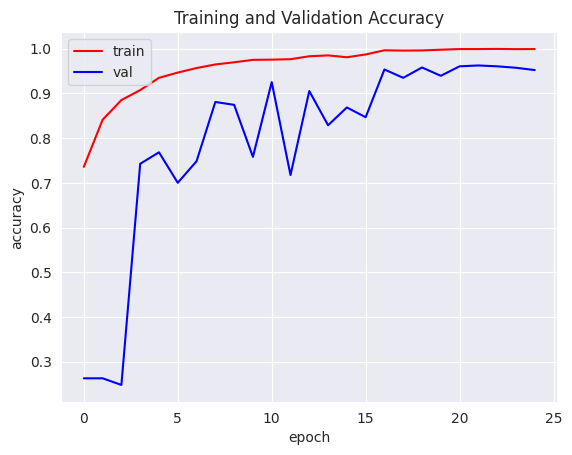

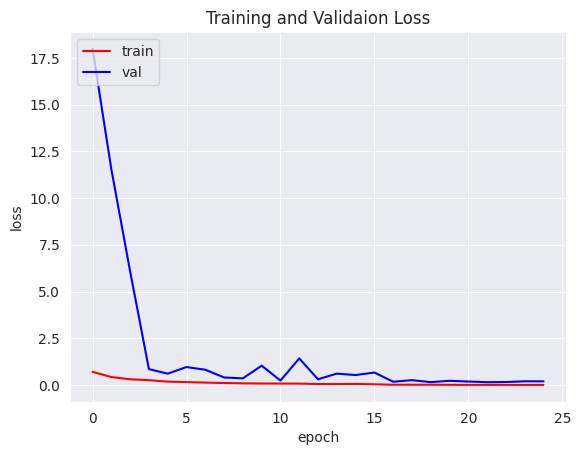

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

49/49 [==============================] - 4s 76ms/step


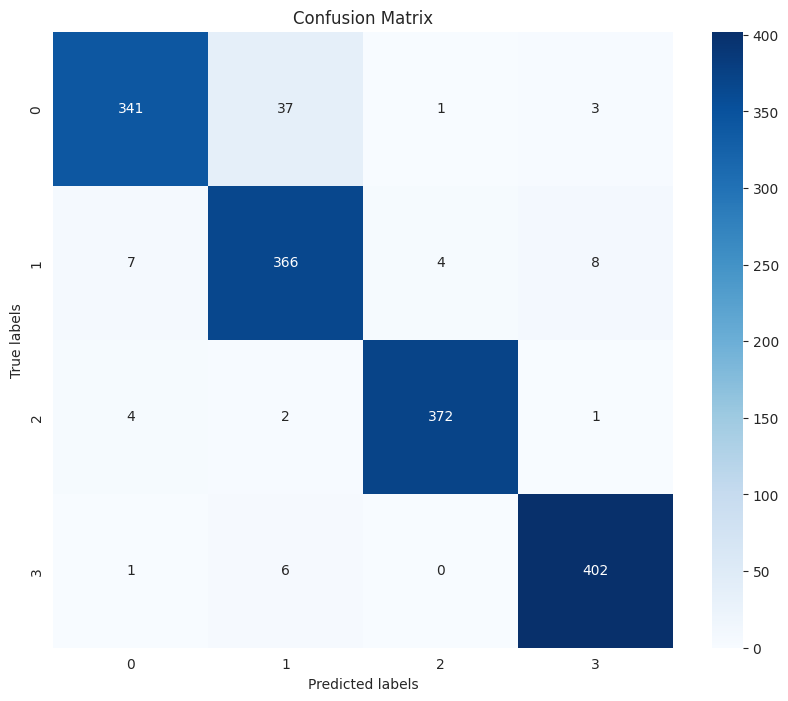

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       382
           1       0.89      0.95      0.92       385
           2       0.99      0.98      0.98       379
           3       0.97      0.98      0.98       409

    accuracy                           0.95      1555
   macro avg       0.95      0.95      0.95      1555
weighted avg       0.95      0.95      0.95      1555



In [33]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Mendapatkan prediksi dari model
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Mendapatkan label sebenarnya dari test generator
y_true = test_generator.classes

# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Menampilkan confusion matrix menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan classification report
print(classification_report(y_true, y_pred))


1/1 [==============================] - 0s 467ms/step


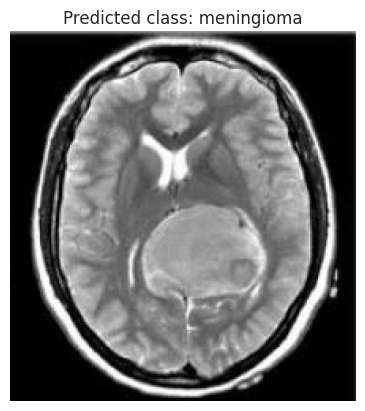

In [34]:
# Load the best saved model
best_model = load_model('Best_model.keras')

# Function to make predictions
def predict_image(image_path):
  img = load_img(image_path, target_size=(256, 256))
  img_array = img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0  # Normalize the image

  prediction = best_model.predict(img_array)
  predicted_class = np.argmax(prediction)

  class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
  predicted_label = class_labels[predicted_class]

  return predicted_label

# Example usage
image_path = 'Dataset-Final/test/meningioma/Te-meTr_0006.jpg'
prediction = predict_image(image_path)
image_path = cv2.imread(image_path)
plt.imshow(image_path)
plt.title(f"Predicted class: {prediction}")
plt.axis('off')
plt.show()



# Konversi Model

In [35]:
save_path = 'saved_model/'
tf.saved_model.save(model, save_path)

In [36]:
!pip install tensorflow==2.16.2
!tensorflowjs_converter --input_format=keras brain_detection_model.h5 save_models/tfjs_model


  Using cached tensorflow-2.16.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorflow-2.16.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (590.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.4 MB/s eta 0:00:00
Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found exi

2024-08-13 14:51:13.241813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 14:51:13.270389: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 14:51:13.270462: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 14:51:14.339111: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [37]:
import tensorflow as tf

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('brain_disease.tflite', 'wb') as f:
    f.write(tflite_model)


In [38]:
!pip freeze > requirements.txt
